In [20]:
#reading json file in its entirity

%matplotlib notebook
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

index='temp'
index_number= 5

data = pd.read_json('weather.json', lines=True)
print(data)

                                                     city        clouds  \
0       {'id': 14256, 'name': 'Azadshahr', 'findname':...   {'all': 90}   
1       {'id': 56166, 'name': 'Jilib', 'findname': 'JI...    {'all': 0}   
2       {'id': 55671, 'name': 'Kismaayo', 'findname': ...    {'all': 0}   
3       {'id': 60019, 'name': 'Eyl', 'findname': 'EYL'...    {'all': 0}   
4       {'id': 23814, 'name': 'Kahriz', 'findname': 'K...   {'all': 75}   
5       {'id': 53654, 'name': 'Mogadishu', 'findname':...   {'all': 75}   
6       {'id': 62691, 'name': 'Ceerigaabo', 'findname'...    {'all': 0}   
7       {'id': 64460, 'name': 'Beledweyne', 'findname'...    {'all': 0}   
8       {'id': 64536, 'name': 'Baydhabo', 'findname': ...    {'all': 0}   
9       {'id': 32723, 'name': 'Istgah-e Garmsar', 'fin...    {'all': 0}   
10      {'id': 18918, 'name': 'Protaras', 'findname': ...   {'all': 75}   
11      {'id': 32767, 'name': 'Qarchak', 'findname': '...   {'all': 75}   
12      {'id': 62788, 'na

In [21]:
#expanding the main category of the json file

df_main=pd.DataFrame()

df_main=data['main'][0:209578]

df_main.to_json('weather_main.json', orient='values')

df_main_expanded=pd.read_json('weather_main.json')
print(df_main_expanded)
    
    

        humidity  pressure     temp  temp_max  temp_min
0             71   1022.00  287.070   289.150   284.150
1             36   1008.39  309.929   309.929   309.929
2            100   1009.87  301.329   301.329   301.329
3             80   1010.67  302.229   302.229   302.229
4             66   1021.00  285.620   286.150   285.150
5             59   1011.00  305.150   305.150   305.150
6             36   1008.79  303.229   303.229   303.229
7             31   1007.83  310.029   310.029   310.029
8             35   1007.83  309.079   309.079   309.079
9             35   1014.75  291.529   291.529   291.529
10            72   1015.00  290.350   291.150   289.820
11            22   1020.00  294.250   295.150   293.150
12            92   1010.47  302.479   302.479   302.479
13            31   1008.47  310.279   310.279   310.279
14            56   1015.99  285.579   285.579   285.579
15            99   1014.03  281.279   281.279   281.279
16            35   1007.79  310.079   310.079   

In [22]:
#expanding the 'city' category of the json file

df_city=pd.DataFrame()
df_city=data['city'][0:209578]
df_city.to_json('weather_city.json', orient='values')
df_city_expanded=pd.read_json('weather_city.json')
print(df_city_expanded)

#expanding the 'coord' category within the 'city' category
df_coord=pd.DataFrame()
df_coord=df_city_expanded['coord'][0:209578]
df_coord.to_json('weather_coord.json', orient='values')
df_coord_expanded=pd.read_json('weather_coord.json')
print(df_coord_expanded)

                                                  coord country  \
0                  {'lon': 48.570728, 'lat': 34.790878}      IR   
1        {'lon': 42.785351, 'lat': 0.48829000000000006}      SO   
2       {'lon': 42.545361, 'lat': -0.35817000000000004}      SO   
3                     {'lon': 49.816399, 'lat': 7.9803}      SO   
4                  {'lon': 47.055302, 'lat': 34.383801}      IR   
5                     {'lon': 45.34375, 'lat': 2.03711}      SO   
6                    {'lon': 47.36795, 'lat': 10.61616}      SO   
7                    {'lon': 45.203609, 'lat': 4.73583}      SO   
8                    {'lon': 43.649799, 'lat': 3.11383}      SO   
9                   {'lon': 52.309422, 'lat': 35.23455}      IR   
10                 {'lon': 34.058331, 'lat': 35.012501}      CY   
11                  {'lon': 51.56889, 'lat': 35.439442}      IR   
12                   {'lon': 47.180641, 'lat': 3.84878}      SO   
13                   {'lon': 45.500481, 'lat': 2.78087}      S

              lat         lon
0       34.790878   48.570728
1        0.488290   42.785351
2       -0.358170   42.545361
3        7.980300   49.816399
4       34.383801   47.055302
5        2.037110   45.343750
6       10.616160   47.367950
7        4.735830   45.203609
8        3.113830   43.649799
9       35.234550   52.309422
10      35.012501   34.058331
11      35.439442   51.568890
12       3.848780   47.180641
13       2.780870   45.500481
14      36.213001   49.195999
15      34.073399   47.972500
16       1.333330   42.666672
17      14.253880   44.311760
18       5.350500   48.526798
19      13.786940   45.230400
20      13.756380   43.802860
21      14.758630   49.606392
22      35.466671   50.533329
23       2.760300   46.322201
24       4.000000   45.500000
25      36.667431   51.461639
26      11.238610   43.123329
27      16.002951   43.197239
28       2.316670   42.316669
29      15.850000   44.775002
...           ...         ...
209548 -18.632681  146.324478
209549  37

In [24]:
#concatenating expanded dataframes
df_final = pd.concat([df_coord_expanded, df_main_expanded], axis=1)

#rescaling lattitude and longitude for easy binning
df_final['lat']=(df_final['lat']+90)*100/180
df_final['lon']=(df_final['lon']+180)*100/360

print(df_final)

              lat        lon  humidity  pressure     temp  temp_max  temp_min
24587   56.817117  77.742231        70   1008.00  304.150   304.150   304.150
24598   54.380450  77.333355        58   1010.00  305.420   306.150   304.150
24611   55.175978  77.692178        70   1010.00  305.680   306.480   304.150
24618   54.592594  77.662036        70   1009.00  305.220   306.150   304.150
24623   55.083333  77.532408        59   1008.00  306.320   306.480   306.150
24627   54.678022  77.609770        55   1009.00  305.570   306.480   304.150
24628   54.484600  77.581181        55   1009.00  306.150   306.150   306.150
24629   54.845589  77.707994        70   1009.00  305.350   306.480   304.150
24633   54.500000  77.495369        55   1009.00  306.150   306.150   306.150
24634   60.758811  77.556076        33   1007.19  302.929   302.929   302.929
24635   60.534756  77.564909        19   1009.00  308.700   310.150   307.590
24643   55.092594  77.569444        59   1008.00  306.310   306.

In [7]:
#Making a cartesian categorical grouping based on evenly spaced bins of specified longitude and latitude

df_grouped = df_final.assign(
    lat_cut=pd.cut(df_final['lat'], np.linspace(0, 100, 101), labels=np.arange(0, 100)),
    lon_cut=pd.cut(df_final['lon'], np.linspace(0, 100, 101), labels=np.arange(0, 100))
)
print(df_grouped)
df_grouped_product = df_grouped.assign(cartesian=pd.Categorical(df_grouped.filter(regex='_cut').apply(tuple, 1))).reset_index()
print(df_grouped_product)

              lat        lon  humidity  pressure     temp  temp_max  temp_min  \
0       69.328266  63.491869        71   1022.00  287.070   289.150   284.150   
1       50.271272  61.884820        36   1008.39  309.929   309.929   309.929   
2       49.801017  61.818156       100   1009.87  301.329   301.329   301.329   
3       54.433500  63.837889        80   1010.67  302.229   302.229   302.229   
4       69.102112  63.070917        66   1021.00  285.620   286.150   285.150   
5       51.131728  62.595486        59   1011.00  305.150   305.150   305.150   
6       55.897867  63.157764        36   1008.79  303.229   303.229   303.229   
7       52.631017  62.556558        31   1007.83  310.029   310.029   310.029   
8       51.729906  62.124944        35   1007.83  309.079   309.079   309.079   
9       69.574750  64.530395        35   1014.75  291.529   291.529   291.529   
10      69.451389  59.460648        72   1015.00  290.350   291.150   289.820   
11      69.688579  64.324692

In [8]:
#averaging main data by geographic bin
df_avg=df_grouped_product.groupby('cartesian').mean().reset_index()
print(df_avg)

#re-adding the lattitude and longitude bins to the averaged data as integer columns
df_avg[['lat_cut','lon_cut']]=pd.DataFrame(df_avg.cartesian.tolist(), index= df_avg.index)
print(df_avg.dtypes)

     cartesian          index        lat        lon    humidity     pressure  \
0      (6, 54)  164926.000000   6.578577  54.557294    0.000000  1022.790000   
1      (6, 96)  191798.000000   6.858139  96.728516  100.000000   985.150000   
2     (18, 40)  132401.000000  18.888889  40.833333   95.000000   988.510000   
3     (19, 31)  139457.200000  19.601852  31.197222   87.200000   989.372000   
4     (19, 39)  128656.000000  19.843828  39.858555   98.000000   987.590000   
5     (20, 29)  141863.000000  20.833189  29.722036   95.000000   986.710000   
6     (20, 30)  140116.000000  20.465277  30.343750   81.000000   991.000000   
7     (20, 31)  139138.000000  20.117951  31.191817   87.000000   993.000000   
8     (21, 29)  156295.250000  21.300444  29.883773   68.500000   991.820000   
9     (21, 30)  139305.500000  21.333881  30.770666   61.000000   994.000000   
10    (21, 33)  129927.000000  21.276179  33.769028   93.000000   999.000000   
11    (22, 29)  139665.000000  22.032916

In [70]:
#Setting up a grid for graphing on a sphere
theta = np.linspace(-np.pi,np.pi, 100)
phi=np.linspace(-np.pi/2, np.pi/2, 100)
phi, theta = np.meshgrid(phi, theta)
print(phi)
print(theta)

#conversion from spherical to euclidean coords
x= np.cos(phi)*np.cos(theta)
y = np.cos(phi)*np.sin(theta)
z=np.sin(phi)

[[-1.57079633 -1.53906307 -1.50732981 ...,  1.50732981  1.53906307
   1.57079633]
 [-1.57079633 -1.53906307 -1.50732981 ...,  1.50732981  1.53906307
   1.57079633]
 [-1.57079633 -1.53906307 -1.50732981 ...,  1.50732981  1.53906307
   1.57079633]
 ..., 
 [-1.57079633 -1.53906307 -1.50732981 ...,  1.50732981  1.53906307
   1.57079633]
 [-1.57079633 -1.53906307 -1.50732981 ...,  1.50732981  1.53906307
   1.57079633]
 [-1.57079633 -1.53906307 -1.50732981 ...,  1.50732981  1.53906307
   1.57079633]]
[[-3.14159265 -3.14159265 -3.14159265 ..., -3.14159265 -3.14159265
  -3.14159265]
 [-3.07812614 -3.07812614 -3.07812614 ..., -3.07812614 -3.07812614
  -3.07812614]
 [-3.01465962 -3.01465962 -3.01465962 ..., -3.01465962 -3.01465962
  -3.01465962]
 ..., 
 [ 3.01465962  3.01465962  3.01465962 ...,  3.01465962  3.01465962
   3.01465962]
 [ 3.07812614  3.07812614  3.07812614 ...,  3.07812614  3.07812614
   3.07812614]
 [ 3.14159265  3.14159265  3.14159265 ...,  3.14159265  3.14159265
   3.14159265]]


In [71]:
#maximum and minimum data for normalizing indices
figmax, figmin = df_avg[index].max(), df_avg[index].min()
print(figmax)
print(figmin)

#producing a color map based on data of the chosen index
figcolors=np.zeros(phi.shape)
for foo, row in df_avg.iterrows():
    figcolors[row['lat_cut']][row['lon_cut']]=row[index]
figcolors = np.where((figcolors-figmin)>=0, (figcolors-figmin)/(figmax-figmin), .5)
print(figcolors)

316.529
222.429
[[ 0.5  0.5  0.5 ...,  0.5  0.5  0.5]
 [ 0.5  0.5  0.5 ...,  0.5  0.5  0.5]
 [ 0.5  0.5  0.5 ...,  0.5  0.5  0.5]
 ..., 
 [ 0.5  0.5  0.5 ...,  0.5  0.5  0.5]
 [ 0.5  0.5  0.5 ...,  0.5  0.5  0.5]
 [ 0.5  0.5  0.5 ...,  0.5  0.5  0.5]]


<IPython.core.display.Javascript object>


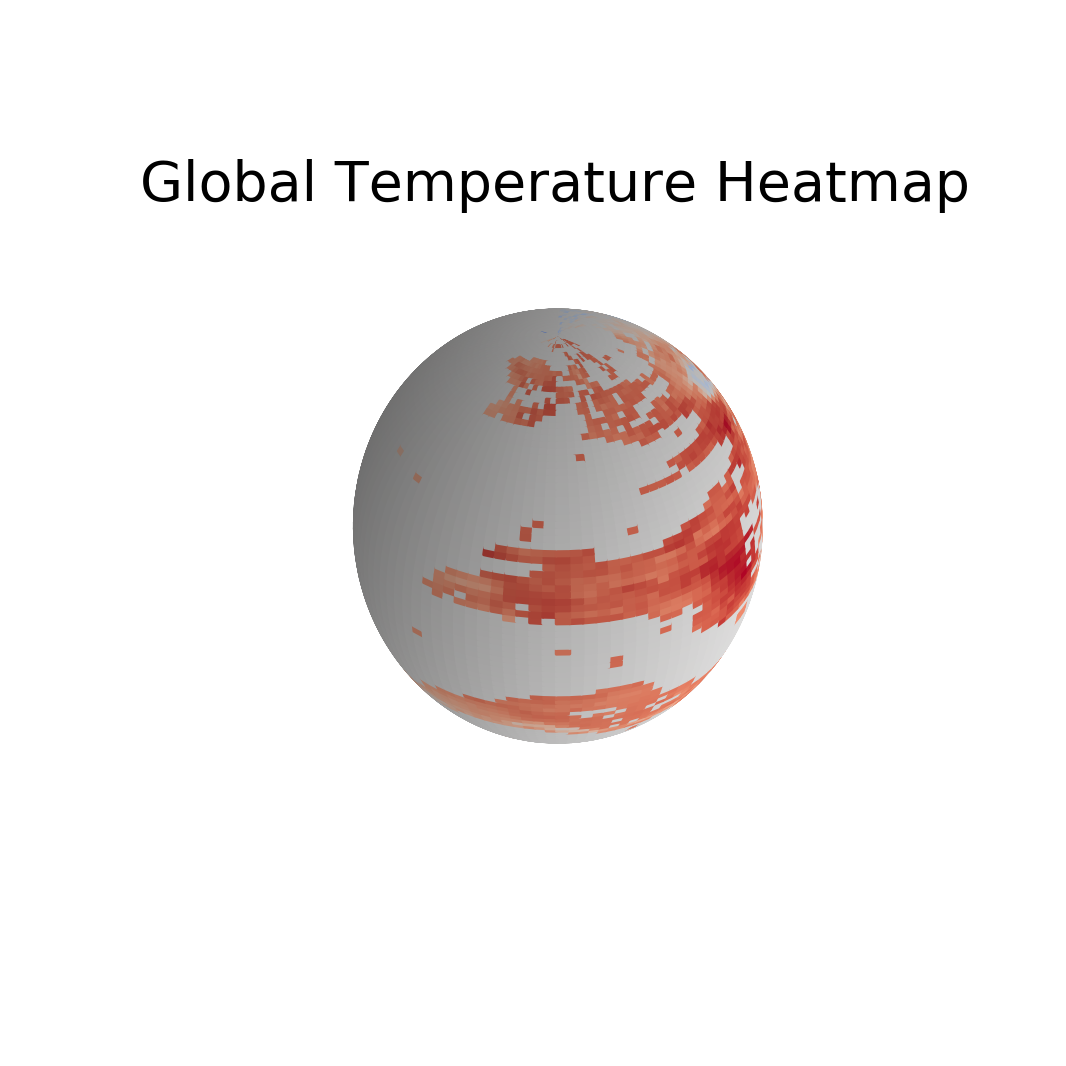

In [72]:
#creating a rotating animation of a globe with the colormap specified above
fig = plt.figure(figsize=plt.figaspect(1.))
axes = fig.add_subplot(111, projection='3d')

surf = axes.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.coolwarm(figcolors))
axes.set_axis_off()
fig.suptitle('Global Temperature Heatmap', fontsize=18, x=0.52, y=.85)
for idx, angle in enumerate(np.linspace(0, 360, 10)):
    axes.view_init(30, angle)
    plt.draw()
    plt.savefig('temp_heatmap-%04d.png' % idx)
plt.show()

In [ ]:
"""
Benefits of my data visualization:

1. It condenses a large data set into one diagram without losing much of the data's descriptiveness.
2. It is interactive. With the command "%matplotlib notebook", an inline visual is created whose axes can be rotated
around using the cursor.
3. It is visually intuitive, easy to understand, and the gaps in global data are filled in with the white color
representing the most neutral zone of the divergent colormap, in which warmer colors represent warmer temperatures.
4. It is accesible to a wide audience without training in data analysis.
5. The same code can be adapted, by changing the "index" and "index_number" parameters, to a colormap of any of the
other weather measurements. Temperature was used in the above diagram for brevity.
6. The packages I have used are basic; mainly matplotlib, pandas, and numpy. The only nonstandard package needed was 
"mpl_toolkits.mplot3d", which was essential for the 3d graphics.
"""